# **Import Packets**

In [ ]:
import json
import re
import nltk
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Data Balancing**

In [29]:
# Read the JSON file
with open('G3-11730.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# Total number of samples and target retention number
total_samples = len(data)
desired_samples = 10000

# Perform random sampling
if total_samples <= desired_samples:
    selected_samples = data
else:
    selected_samples = random.sample(data, desired_samples)

# Write the sampled results to a new JSON file
with open('G3.json', 'w', encoding='utf-8') as f:
    json.dump(selected_samples, f, ensure_ascii=False, indent=4)

print(f"Random sampling completed, retained {len(selected_samples)} samples.")

Random sampling completed, retained 10000 samples.


# **Data Merging (GPT3.0, GPT3.5, GPT4.0)**

In [ ]:
# Read data from each JSON file
file_names = ["G3.json", "G35.json", "G4.json"]
all_data = []

for file_name in file_names:
    with open(file_name, 'r', encoding='utf-8') as f:
        data = json.load(f)
        all_data.extend(data)

# Write the combined data to a new JSON file
output_file_name = "GPT_total.json"
with open(output_file_name, 'w', encoding='utf-8') as f:
    json.dump(all_data, f, ensure_ascii=False, indent=4)

print(f"The file merge has been completed and the name of the merged file is {output_file_name}, containing {len(all_data)} samples.")


The file merge has been completed and the name of the merged file is GPT_total.json, containing 30000 samples.


# **Data Preprocessing**

In [ ]:
def has_missing_body(sample):
    return 'body' not in sample

def clean_text(text):
    # Data cleaning: remove special symbols and links
    text = re.sub(r'http\S+', '', text)  # Remove links
    text = re.sub(r'\W+', ' ', text)  # Remove special symbols
    return text

def preprocess_text(text):
    # Text preprocessing: convert to lowercase, remove punctuation, and numbers
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    return text

def tokenize_text(text):
    # Text tokenization: split the text by space
    return text.split()

def remove_stopwords(words_list):
    # Stopwords handling: remove stopwords
    stop_words = set(stopwords.words('english'))
    return [word for word in words_list if word.lower() not in stop_words]

def remove_short_words(words_list):
    # Remove words with length less than or equal to 2
    return [word for word in words_list if len(word) > 2]

def process_samples(input_file, output_file):
    with open(input_file, 'r') as file:
        samples = json.load(file)

    processed_samples = []
    unique_samples = set()  # Used to record the unique processed sample content

    for sample in samples:
        if has_missing_body(sample):
            continue

        body_text = sample['body']

        # Data cleaning
        body_text = clean_text(body_text)

        # Text preprocessing
        body_text = preprocess_text(body_text)

        # Text tokenization
        words_list = tokenize_text(body_text)

        # Stopwords handling and removing short words
        words_list = remove_stopwords(words_list)
        words_list = remove_short_words(words_list)

        # Reassemble the text
        processed_text = ' '.join(words_list)

        # Check if the same sample content already exists
        if processed_text in unique_samples:
            continue

        # Add to the unique sample set
        unique_samples.add(processed_text)

        # Update the 'body' field of the sample
        sample['body'] = processed_text

        processed_samples.append(sample)

    with open(output_file, 'w') as file:
        json.dump(processed_samples, file, indent=4)

    print(f"Sample size after preprocessing: {len(processed_samples)}")

# Replace with your file paths
input_file_path = 'G35.json'
output_file_path = 'Processed_GPT_35.json'

process_samples(input_file_path, output_file_path)


Sample size after preprocessing: 7826


# **Insert Reddit Shape Image**

In [ ]:
# Load the image
image_path = "Reddit.png"  # Replace with your image path
image = Image.open(image_path)

# Convert to grayscale
gray_image = image.convert("L")

# Enhance contrast
enhanced_image = ImageOps.autocontrast(gray_image)

# Binarization
threshold = 128  # Threshold, can be adjusted as needed
bw_image = enhanced_image.point(lambda p: p > threshold and 255)

# Display the processed black and white image
bw_image.show()

# Save the processed black and white image
bw_image.save("Reddit_bw.png")

# **Reddit Shape Word Cloud for GPT_total**

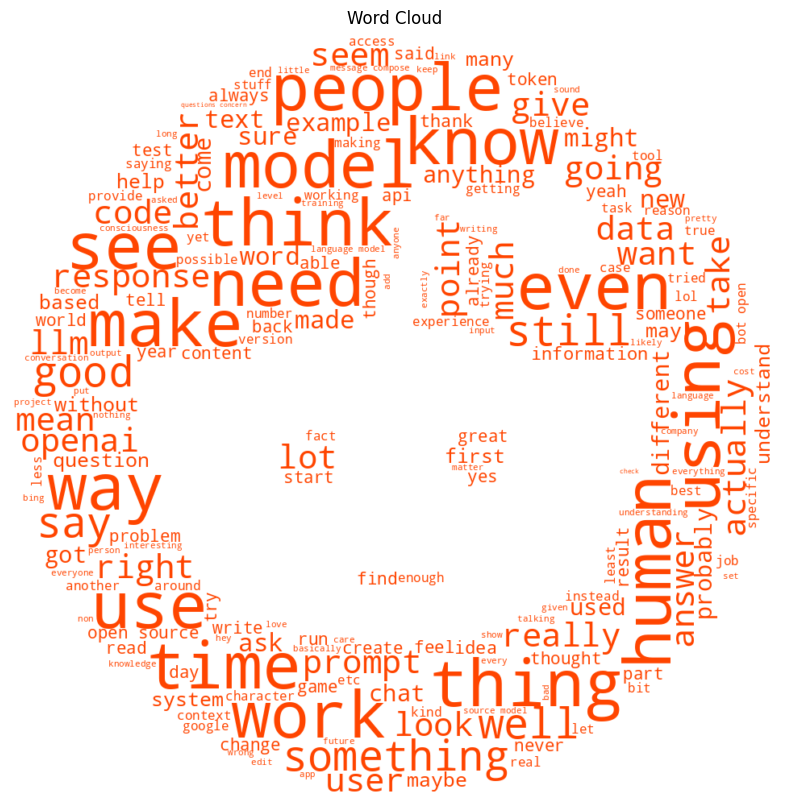

In [ ]:
# Replace with processed file path
processed_file_path = 'Processed_GPT_total.json'

with open(processed_file_path, 'r') as file:
    processed_samples = json.load(file)

# Extract the text content from the samples to form a large text string
all_text = ' '.join([sample['body'] for sample in processed_samples])

# Remove specific words (e.g., "chatgpt" and "gpt")
exclude_words = ["chatgpt", "gpt", "gt", "amp", "xb", "also", "one"]
all_text = ' '.join([word for word in all_text.split() if word.lower() not in exclude_words])

# Open the Reddit black and white image
reddit_mask = np.array(Image.open("Reddit_bw.png"))

# Invert the black and white image to make the white parts black and the black parts white
inverted_mask = reddit_mask

# Create a WordCloud object using the Reddit image as a custom shape
wordcloud = WordCloud(width=1000, height=500, background_color='white', relative_scaling=0,
                      max_font_size=80, random_state=40, mask=inverted_mask,
                      contour_color='steelblue', colormap='Oranges',
                      color_func=lambda *args, **kwargs: (255, 69, 0)).generate(all_text)

# Plot the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


# **Word frequency bar graph display for GPT_total**


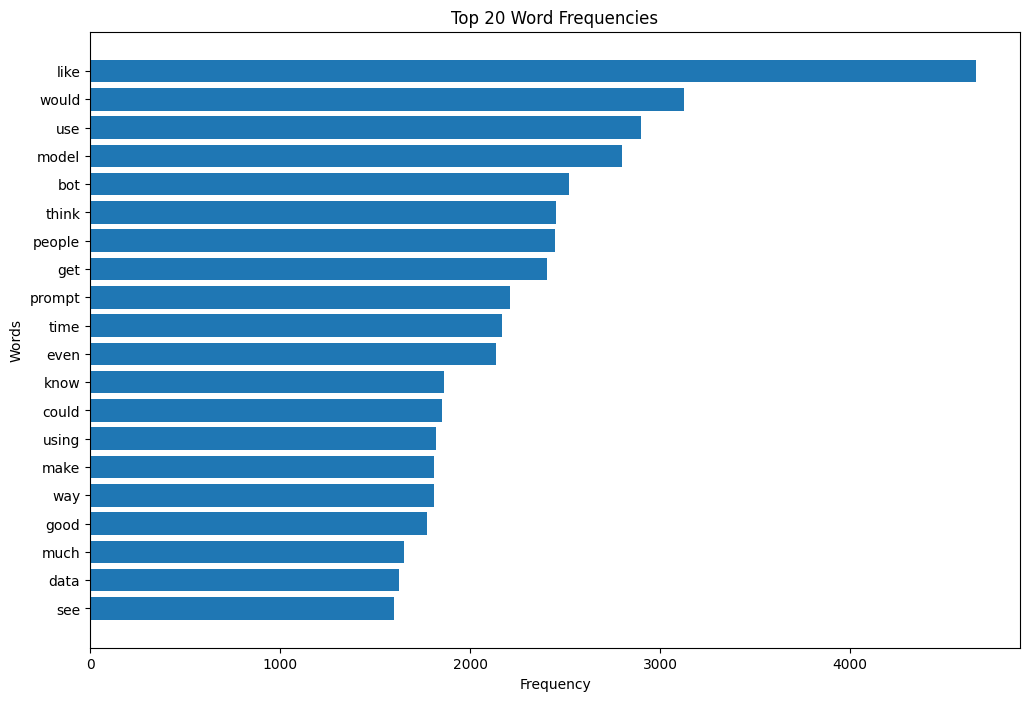

In [ ]:
# Replace with your processed file path
processed_file_path = 'Processed_GPT_total.json'

with open(processed_file_path, 'r') as file:
    processed_samples = json.load(file)

# Extract the text content from the samples to form a large text string
all_text = ' '.join([sample['body'] for sample in processed_samples])

# Remove specific words (e.g., "chatgpt" and "gpt")
exclude_words = ["chatgpt", "gpt", "gt", "amp", "xb", "also", "one"]
all_text = ' '.join([word for word in all_text.split() if word.lower() not in exclude_words])

# Count word frequency
words_list = all_text.split()
word_freq = Counter(words_list)

# Extract the 20 most frequent words and their frequencies
top_words = word_freq.most_common(20)
top_words_dict = dict(top_words)

# Plot word frequency bar chart
plt.figure(figsize=(12, 8))

# Use barh function to draw a horizontal bar chart
plt.barh(list(top_words_dict.keys()), list(top_words_dict.values()))

# To make the word with the highest frequency at the top, use the invert_yaxis function
plt.gca().invert_yaxis()

plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Word Frequencies')
plt.show()


# **Word cloud display for GPT3.0, GPT3.5 and GPT4.0**

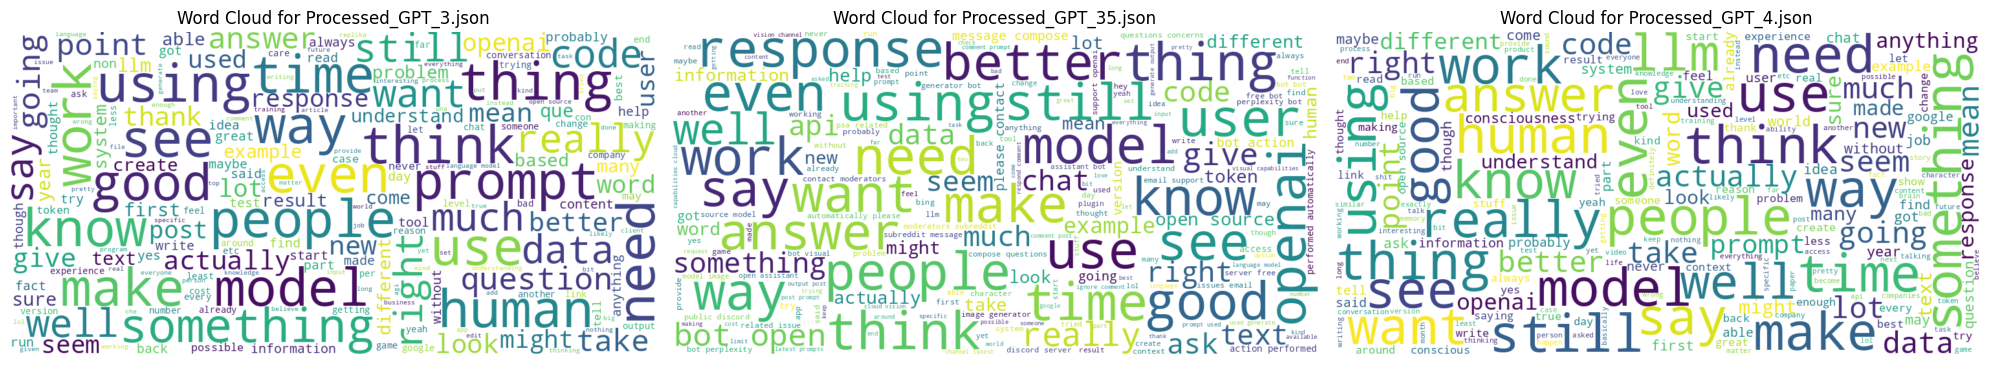

In [ ]:
# Replace with processed file path
processed_file_path = 'Processed_GPT_4.json'

with open(processed_file_path, 'r') as file:
    processed_samples = json.load(file)

# Extract the text content from the samples to form a large text string
all_text = ' '.join([sample['body'] for sample in processed_samples])

# Remove specific words (e.g., "chatgpt" and "gpt")
exclude_words = ["chatgpt", "gpt", "gt", "amp", "xb", "also", "one"]
all_text = ' '.join([word for word in all_text.split() if word.lower() not in exclude_words])

# Create a WordCloud object using the Reddit image as a custom shape
wordcloud = WordCloud(width=1000, height=500, background_color='white', relative_scaling=0,
                      max_font_size=80, random_state=40,
                      colormap='viridis').generate(all_text)  # Use the 'viridis' colormap for vibrant colors

# Plot the word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()
